# Lesson 7.01 K-Means Clustering

## Definitions
- `Cluster` refers to a collection of data points aggregated together because of certain similarities
- `k` refers to the target number of centroids you need in the dataset
- `Centroid` refers to the imaginary or real location representing the center of the cluster
- `means` in the K-means refers to averaging of the data i.e. finding the centroid
- `Euclidean distance` refers to the length of a line segment between the two points. More at this [link](https://en.wikipedia.org/wiki/Euclidean_distance)

## Overview
- `K-Means` is an **unsupervised** ML method where you already have a gauge of an appropriate number of `clusters`
- `K-Means` aims to group similar data points together and discover underlying patterns
    - To achieve this goal, `K-means` looks for a fixed number `(k)` of `clusters` in a data set
- `K-Means` is used for quickly predicting groupings from within an unlabeled data set
- Predictions are based on the number of `centroids` present and nearest mean values, given an `Eculidean distance` measurement between observations

## Setting up for K-Means clustering analysis
- Each data point is allocated to each of the clusters through reducing the in-cluster sum of squares
- In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible


## Import Libraries and Load Data
- Let’s see the steps on how the K-means machine learning algorithm works in this lesson
- We’ll use the `sklearn` library and the `Iris` data set to illustrate an example of K-means clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
plt.figure(figsize=(7,4))
# prints the plotting dimensions for matplotlib

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [4]:
iris = datasets.load_iris()

# apply scaling to X values. more info at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
X = scale(iris.data)
y = pd.DataFrame(iris.target)

variable_names = iris.feature_names

# display first 10 rows
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [5]:
# Instantiate a clustering object with a pre-determined number of clusters
clustering = KMeans(n_clusters=3, max_iter=500, random_state=5)

# fit model to data set and learn its statistical parameters (mean, variance)
# apply kmeans clustering with 3 clusters to the input data from X
# clustering itself happens with the fit method
clustering.fit(X)

KMeans(max_iter=500, n_clusters=3, random_state=5)

## Plotting your model outputs

In [6]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

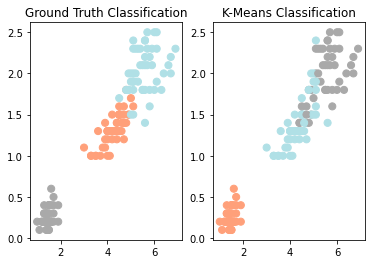

In [7]:
# Set colour theme for scatter plot
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

# For this data viz, we will create the first subplot of 1 row and 2 columns
# The 3rd parameter indicates the position of the 1st subplot
plt.subplot(1,2,1)

# Plot petal length on the X axis against the petal width on the y axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')


# For this data viz, we will create the second subplot of 1 row and 2 columns
# The 3rd parameter indicates the position of the 2nd subplot
# This shows the predicted values of y
plt.subplot(1,2,2)

# change the colour theme so that it colours accordingy to the clustering labels
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

- Model seems to have done a decent job in actually predicting the clusters but the labels seemed to have received the wrong numbers
- This happens sometimes and can be fixed with re-labelling as seen below

Text(0.5, 1.0, 'K-Means Classification')

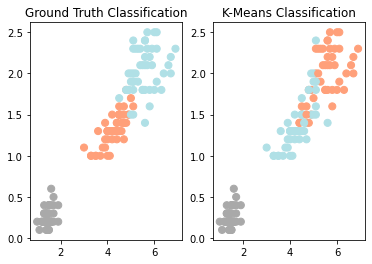

In [8]:
# numpy choose function is used to do re-labelling of predicted clustering labels
# assign correct set of labels to modeled data
# in other words, reorder the labels to have colors matching the cluster results
# in k-means classification,  grey and orange labels can be switched to match the correct numbers
relabel = np.choose(clustering.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Evaluate your clustering results
To demonstrate the potential accuracy, evaluation has been be done using the classification report

In [9]:
# required parameters - y-true values and y-pred values
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



There are 2 ways by which we can select an optimal number of clusters (K).

#### 1. Elbow Curve Method
The elbow method runs k-means clustering (kmeans number of clusters) on the dataset for a range of values of k (say 1 to 10).

 - Perform K-means clustering with all these different values of K. 
 - For each of the K values, we calculate average distances to the centroid across all data points.
 - Plot these points and find the point where the average distance from the centroid falls suddenly (i.e. where “Elbow” is located).

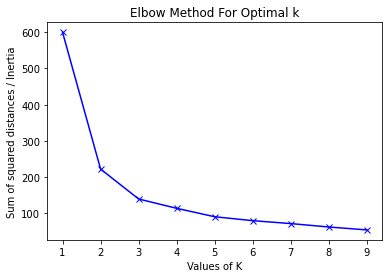

In [10]:
sum_of_squared_distances = []
K = range(1,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    # Inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for
    # Inertia can range from zero to infinity
    sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances / Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

- The curve above looks like an elbow
- In the above plot, the elbow is at k=2 (i.e. the sum of squared distances falls suddenly) indicating the optimal k for this dataset is 2

#### 2. Silhouette Score
Silhouette score tells how far away the data points in one cluster are, from the datapoints in another cluster

- The range of silhouette scores are from -1 to 1
- A score of 1 denotes the best meaning that the data points within a cluster to which it belongs are far away from the other clusters
- The worst value is -1. 
- Values near 0 denote overlapping clusters

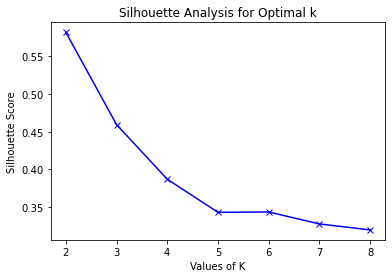

In [11]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for num_clusters in range_n_clusters:
 
    # instantiate and fit kmeans model for each k value
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
    # generate silhouette score
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Analysis for Optimal k')
plt.show()

From the chart above, the silhouette score is maximized at K = 2. Hence K = 2 should be the optimal value for K.

In summary, the Silhouette Score could be used to support the Elbow Method for a more robust decision on selection of optimal value for K